In [31]:
from pathlib import Path
import pandas as pd
import pyvista as pv
import numpy as np
import os
from knee_stress_predict.config import raw_data_dir, processed_data_dir
from knee_stress_predict.objects.KneeGeometry import KneeGeometry
from knee_stress_predict.objects.data_set_vis import plot_subdivisions_tibia_car

# PATIENTS DATA LOADING

This notebook loads data from set_3. Set_3 was provided by Kalin. Raw data for that set is located in data/raw/set_3. The set consists of 169 patients' data that include knee geometry (7 elements) and a pickle file with tibia contact pressure data.

## Loading knee geometry for each patient



In [32]:
patients_knees = {}
data_set_name = "set_3"
data_dir = Path.joinpath(raw_data_dir, data_set_name)
for i, folder_name in enumerate(os.listdir(data_dir)):
    patient_dir = Path.joinpath(data_dir, folder_name)
    patient_knee = KneeGeometry(patient_dir)
    patients_knees[folder_name] = patient_knee

### Number of points, volume and bound size in each structure

Create a Data Frame that shows _______ for each knee structure for all patients:
- size of the point cloud (number of points)
- volume
- bounds for x
- bounds for y
- bounds for z

Below is the example of a point cloud of Tibia bone for Patient 9905863M00

In [33]:
print(len(patients_knees))
for key, value in patients_knees.items():
    print(key)

169
9003406M00
9003406M12
9007827M00
9007827M12
9040390M00
9040390M12
9047800M00
9047800M12
9054866M00
9054866M12
9056363M00
9056363M12
9068453M00
9068453M12
9085290M00
9085290M12
9087863M00
9087863M12
9094865M00
9094865M12
9102858M00
9102858M12
9146462M00
9146462M12
9172459M00
9172459M12
9192885M00
9192885M12
9200458M00
9200458M12
9211869M00
9211869M12
9215390M00
9215390M12
9264046M00
9264046M12
9279291M00
9279291M12
9309170M00
9309170M12
9311328M00
9311328M12
9331465M00
9331465M12
9332085M00
9332085M12
9352437M00
9352437M12
9352883M00
9352883M12
9357137M00
9357137M12
9357383M00
9368622M00
9368622M12
9369649M00
9369649M12
9382271M00
9382271M12
9403165M00
9403165M12
9415074M00
9415074M12
9444401M00
9444401M12
9482482M00
9493245M00
9493245M12
9496443M00
9496443M12
9539084M00
9539084M12
9567704M00
9587749M00
9596610M00
9596610M12
9597990M00
9597990M12
9599539M00
9599539M12
9602703M00
9602703M12
9607698M00
9607698M12
9625955M00
9625955M12
9626069M00
9626069M12
9651690M00
9651690M12
965746

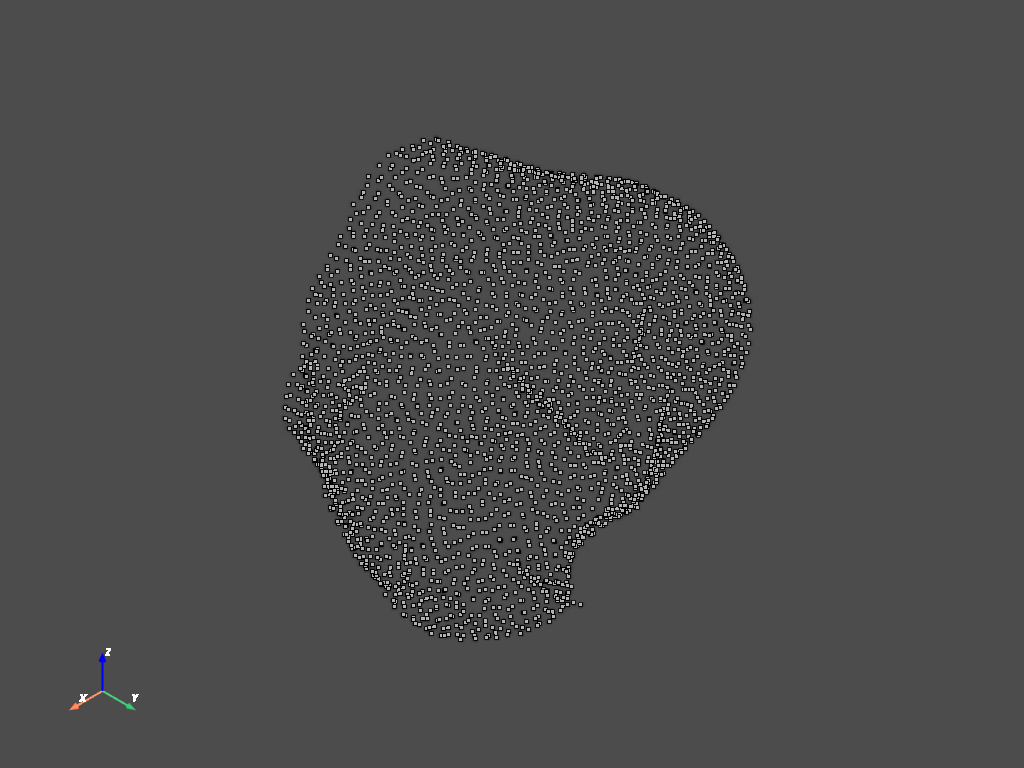

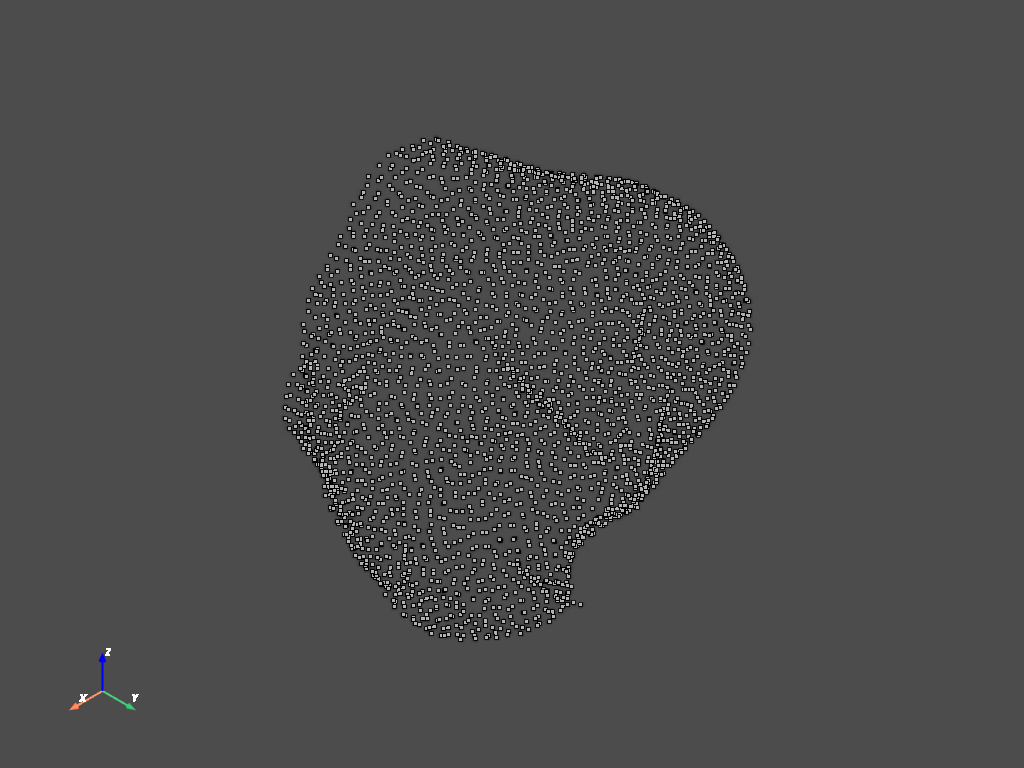

In [34]:
knee = patients_knees["9905863M00"]
tibia_point_cloud = pv.PolyData(knee.tibia.points)
tibia_point_cloud.plot(eye_dome_lighting=True, jupyter_backend="static")

In [35]:
knee_df = pd.DataFrame()

for key, value in patients_knees.items():
    print(key)
    df = {'Code': key,
          'Patella_PN': value.patella.n_points,
          'Femur_PN': value.femur.n_points,
          'Tibia_PN': value.tibia.n_points,
          'Patella_Car_PN': value.pat_cart.n_points,
          'Femur_Car_PN': value.fem_cart.n_points,
          'Tibia_M_Car_PN': value.tibia_cart_med.n_points,
          'Tibia_L_Car_PN': value.tibia_cart_lat.n_points,

          'Patella_volume': value.patella.volume,
          'Femur_volume': value.femur.volume,
          'Tibia_volume': value.tibia.volume,
          'Patella_Car_volume': value.pat_cart.volume,
          'Femur_Car_volume': value.fem_cart.volume,
          'Tibia_M_Car_volume': value.tibia_cart_med.volume,
          'Tibia_L_Car_volume': value.tibia_cart_lat.volume,

        # The form of bounds is: (xmin, xmax, ymin, ymax, zmin, zmax).
          'Patella_bounds_x': abs(value.patella.bounds[0] - value.patella.bounds[1]),
          'Femur_bounds_x': abs(value.femur.bounds[0] - value.femur.bounds[1]),
          'Tibia_bounds_x': abs(value.tibia.bounds[0] - value.tibia.bounds[1]),
          'Patella_Car_bounds_x': abs(value.pat_cart.bounds[0] - value.pat_cart.bounds[1]),
          'Femur_Car_bounds_x': abs(value.fem_cart.bounds[0] - value.fem_cart.bounds[1]),
          'Tibia_M_Car_bounds_x': abs(value.tibia_cart_med.bounds[0] - value.tibia_cart_med.bounds[1]),
          'Tibia_L_Car_bounds_x': abs(value.tibia_cart_lat.bounds[0] - value.tibia_cart_lat.bounds[1]),

          'Patella_bounds_y': abs(value.patella.bounds[2] - value.patella.bounds[3]),
          'Femur_bounds_y': abs(value.femur.bounds[2] - value.femur.bounds[3]),
          'Tibia_bounds_y': abs(value.tibia.bounds[2] - value.tibia.bounds[3]),
          'Patella_Car_bounds_y': abs(value.pat_cart.bounds[2] - value.pat_cart.bounds[3]),
          'Femur_Car_bounds_y': abs(value.fem_cart.bounds[2] - value.fem_cart.bounds[3]),
          'Tibia_M_Car_bounds_y': abs(value.tibia_cart_med.bounds[2] - value.tibia_cart_med.bounds[3]),
          'Tibia_L_Car_bounds_y': abs(value.tibia_cart_lat.bounds[2] - value.tibia_cart_lat.bounds[3]),

          'Patella_bounds_z': abs(value.patella.bounds[4] - value.patella.bounds[5]),
          'Femur_bounds_z': abs(value.femur.bounds[4] - value.femur.bounds[5]),
          'Tibia_bounds_z': abs(value.tibia.bounds[4] - value.tibia.bounds[5]),
          'Patella_Car_bounds_z': abs(value.pat_cart.bounds[4] - value.pat_cart.bounds[5]),
          'Femur_Car_bounds_z': abs(value.fem_cart.bounds[4] - value.fem_cart.bounds[5]),
          'Tibia_M_Car_bounds_z': abs(value.tibia_cart_med.bounds[4] - value.tibia_cart_med.bounds[5]),
          'Tibia_L_Car_bounds_z': abs(value.tibia_cart_lat.bounds[4] - value.tibia_cart_lat.bounds[5]),
          }
    knee_df = knee_df.append(df, ignore_index=True)
knee_df

9003406M00
9003406M12
9007827M00
9007827M12
9040390M00
9040390M12
9047800M00
9047800M12
9054866M00
9054866M12
9056363M00
9056363M12
9068453M00
9068453M12
9085290M00
9085290M12
9087863M00
9087863M12
9094865M00
9094865M12
9102858M00
9102858M12
9146462M00
9146462M12
9172459M00
9172459M12
9192885M00
9192885M12
9200458M00
9200458M12
9211869M00
9211869M12
9215390M00
9215390M12
9264046M00
9264046M12
9279291M00
9279291M12
9309170M00
9309170M12
9311328M00
9311328M12
9331465M00
9331465M12
9332085M00
9332085M12
9352437M00
9352437M12
9352883M00
9352883M12
9357137M00
9357137M12
9357383M00
9368622M00
9368622M12
9369649M00
9369649M12
9382271M00
9382271M12
9403165M00
9403165M12
9415074M00
9415074M12
9444401M00
9444401M12
9482482M00
9493245M00
9493245M12
9496443M00
9496443M12
9539084M00
9539084M12
9567704M00
9587749M00
9596610M00
9596610M12
9597990M00
9597990M12
9599539M00
9599539M12
9602703M00
9602703M12
9607698M00
9607698M12
9625955M00
9625955M12
9626069M00
9626069M12
9651690M00
9651690M12
9657464M00

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Femur_Car_bounds_y,Tibia_M_Car_bounds_y,Tibia_L_Car_bounds_y,Patella_bounds_z,Femur_bounds_z,Tibia_bounds_z,Patella_Car_bounds_z,Femur_Car_bounds_z,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,49.311722,11.095169,11.084142,30.210769,73.680822,61.784069,16.526861,76.027084,45.495615,39.069456
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,49.055346,12.174087,13.671304,31.592102,72.688666,64.087276,19.798871,75.539283,45.991908,41.071282
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,41.440017,9.470180,12.969635,25.243075,64.393183,60.607309,17.130819,67.765464,45.013639,39.856329
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,41.624901,8.603623,12.579697,24.225605,65.093055,62.623901,17.181078,68.310031,45.515432,39.311636
4,9040390M00,670,3907,2560,4935,19150,2840,2840,17988.202111,226082.515840,...,48.204158,11.121469,16.535832,22.443253,70.841798,66.106152,15.145549,75.809675,43.899404,40.233859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,40.442953,10.794289,10.016161,23.248128,59.152637,58.544011,12.996539,63.790515,46.282761,35.520656
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,44.379393,10.404802,14.708811,26.662526,64.186803,62.810235,15.234901,69.141807,49.820480,37.358205
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,43.432913,8.570573,13.684272,26.953287,64.909194,59.505628,17.605118,69.610090,49.298700,37.126191
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,49.163991,10.912200,17.688548,25.373713,70.595052,66.249086,12.531448,75.789110,48.806200,45.203040


9003406M00
9003406M12
9007827M00
9007827M12
9040390M00
9040390M12
9047800M00
9047800M12
9054866M00
9054866M12
9056363M00
9056363M12
9068453M00
9068453M12
9085290M00
9085290M12
9087863M00
9087863M12
9094865M00
9094865M12
9102858M00
9102858M12
9146462M00
9146462M12
9172459M00
9172459M12
9192885M00
9192885M12
9200458M00
9200458M12
9211869M00
9211869M12
9215390M00
9215390M12
9264046M00
9264046M12
9279291M00
9279291M12
9309170M00
9309170M12
9311328M00
9311328M12
9331465M00
9331465M12
9332085M00
9332085M12
9352437M00
9352437M12
9352883M00
9352883M12
9357137M00
9357137M12
9357383M00
9368622M00
9368622M12
9369649M00
9369649M12
9382271M00
9382271M12
9403165M00
9403165M12
9415074M00
9415074M12
9444401M00
9444401M12
9482482M00
9493245M00
9493245M12
9496443M00
9496443M12
9539084M00
9539084M12
9567704M00
9587749M00
9596610M00
9596610M12
9597990M00
9597990M12
9599539M00
9599539M12
9602703M00
9602703M12
9607698M00
9607698M12
9625955M00
9625955M12
9626069M00
9626069M12
9651690M00
9651690M12
9657464M00

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Femur_Car_bounds_y,Tibia_M_Car_bounds_y,Tibia_L_Car_bounds_y,Patella_bounds_z,Femur_bounds_z,Tibia_bounds_z,Patella_Car_bounds_z,Femur_Car_bounds_z,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,49.311722,11.095169,11.084142,30.210769,73.680822,61.784069,16.526861,76.027084,45.495615,39.069456
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,49.055346,12.174087,13.671304,31.592102,72.688666,64.087276,19.798871,75.539283,45.991908,41.071282
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,41.440017,9.470180,12.969635,25.243075,64.393183,60.607309,17.130819,67.765464,45.013639,39.856329
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,41.624901,8.603623,12.579697,24.225605,65.093055,62.623901,17.181078,68.310031,45.515432,39.311636
4,9040390M00,670,3907,2560,4935,19150,2840,2840,17988.202111,226082.515840,...,48.204158,11.121469,16.535832,22.443253,70.841798,66.106152,15.145549,75.809675,43.899404,40.233859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,40.442953,10.794289,10.016161,23.248128,59.152637,58.544011,12.996539,63.790515,46.282761,35.520656
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,44.379393,10.404802,14.708811,26.662526,64.186803,62.810235,15.234901,69.141807,49.820480,37.358205
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,43.432913,8.570573,13.684272,26.953287,64.909194,59.505628,17.605118,69.610090,49.298700,37.126191
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,49.163991,10.912200,17.688548,25.373713,70.595052,66.249086,12.531448,75.789110,48.806200,45.203040


## Simulation length

While looking at the whole data set, we realized that the initial data set of 28 knees are scans of 14 knees, but they have been preprocessed in two different ways. And the difference in max pressure between preprocessing types is comparable with the difference caused by geometry. So we decided to add simulation length based on the knee name as a feature:
- M00 ending in "Code" - stays for 0 mouths simulation
- M12 ending in "Code" - stays for 12 mouths simulation

The graph below demonstrates the problem

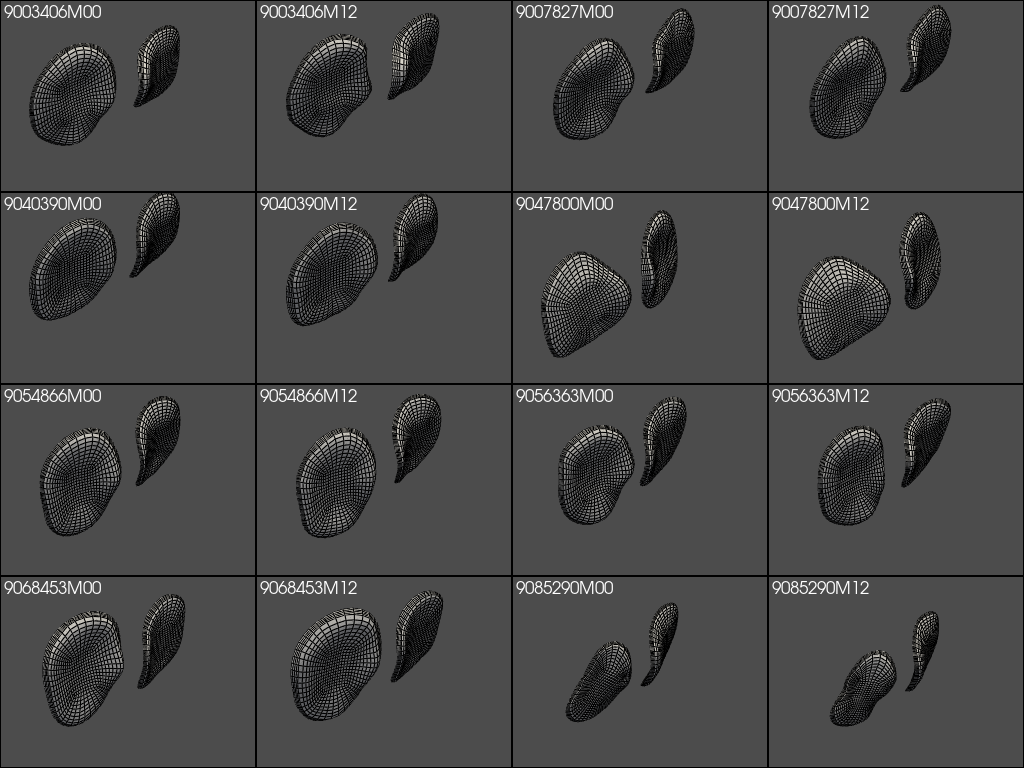

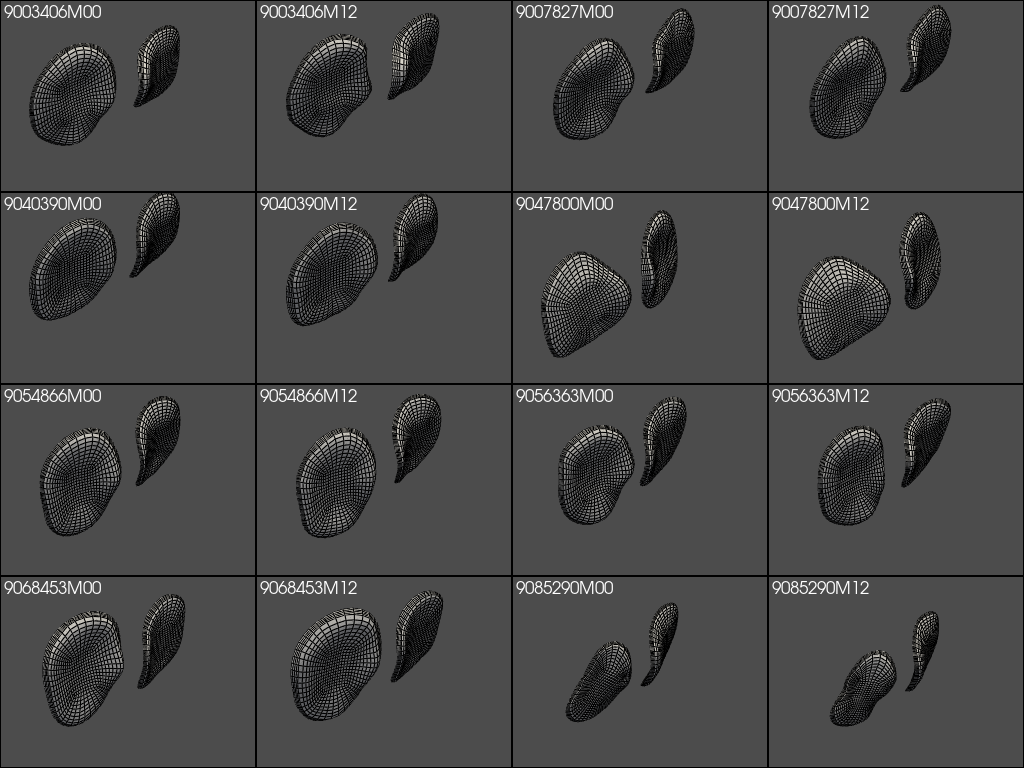

In [36]:
patients_knees_meshes = {}
data_dir = Path.joinpath(raw_data_dir, data_set_name)
rows, cols = 4, 4
for i, folder_name in enumerate(os.listdir(data_dir)):
    if i > rows * cols - 1:
        break
    patient_dir = Path.joinpath(data_dir, folder_name)
    patient_knee = KneeGeometry(patient_dir)
    patients_knees_meshes[folder_name] = patient_knee

plotter = plot_subdivisions_tibia_car(patients_knees_meshes, rows, cols)
plotter.show(jupyter_backend="static")

Let's add simulation length as a feature

In [37]:
knee_df["Simulation_len"] = np.where(knee_df['Code'].str.contains("M00"), 0, 12)
knee_df

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Tibia_M_Car_bounds_y,Tibia_L_Car_bounds_y,Patella_bounds_z,Femur_bounds_z,Tibia_bounds_z,Patella_Car_bounds_z,Femur_Car_bounds_z,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z,Simulation_len
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,11.095169,11.084142,30.210769,73.680822,61.784069,16.526861,76.027084,45.495615,39.069456,0
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,12.174087,13.671304,31.592102,72.688666,64.087276,19.798871,75.539283,45.991908,41.071282,12
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,9.470180,12.969635,25.243075,64.393183,60.607309,17.130819,67.765464,45.013639,39.856329,0
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,8.603623,12.579697,24.225605,65.093055,62.623901,17.181078,68.310031,45.515432,39.311636,12
4,9040390M00,670,3907,2560,4935,19150,2840,2840,17988.202111,226082.515840,...,11.121469,16.535832,22.443253,70.841798,66.106152,15.145549,75.809675,43.899404,40.233859,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,10.794289,10.016161,23.248128,59.152637,58.544011,12.996539,63.790515,46.282761,35.520656,12
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,10.404802,14.708811,26.662526,64.186803,62.810235,15.234901,69.141807,49.820480,37.358205,0
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,8.570573,13.684272,26.953287,64.909194,59.505628,17.605118,69.610090,49.298700,37.126191,12
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,10.912200,17.688548,25.373713,70.595052,66.249086,12.531448,75.789110,48.806200,45.203040,0


,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Tibia_M_Car_bounds_y,Tibia_L_Car_bounds_y,Patella_bounds_z,Femur_bounds_z,Tibia_bounds_z,Patella_Car_bounds_z,Femur_Car_bounds_z,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z,Simulation_len
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,11.095169,11.084142,30.210769,73.680822,61.784069,16.526861,76.027084,45.495615,39.069456,0
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,12.174087,13.671304,31.592102,72.688666,64.087276,19.798871,75.539283,45.991908,41.071282,12
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,9.470180,12.969635,25.243075,64.393183,60.607309,17.130819,67.765464,45.013639,39.856329,0
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,8.603623,12.579697,24.225605,65.093055,62.623901,17.181078,68.310031,45.515432,39.311636,12
4,9040390M00,670,3907,2560,4935,19150,2840,2840,17988.202111,226082.515840,...,11.121469,16.535832,22.443253,70.841798,66.106152,15.145549,75.809675,43.899404,40.233859,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,10.794289,10.016161,23.248128,59.152637,58.544011,12.996539,63.790515,46.282761,35.520656,12
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,10.404802,14.708811,26.662526,64.186803,62.810235,15.234901,69.141807,49.820480,37.358205,0
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,8.570573,13.684272,26.953287,64.909194,59.505628,17.605118,69.610090,49.298700,37.126191,12
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,10.912200,17.688548,25.373713,70.595052,66.249086,12.531448,75.789110,48.806200,45.203040,0


### Distance between femur cartilages and tibia bone

Below is the visualization of the implicit distance between tibia cartilages and the femur bone.

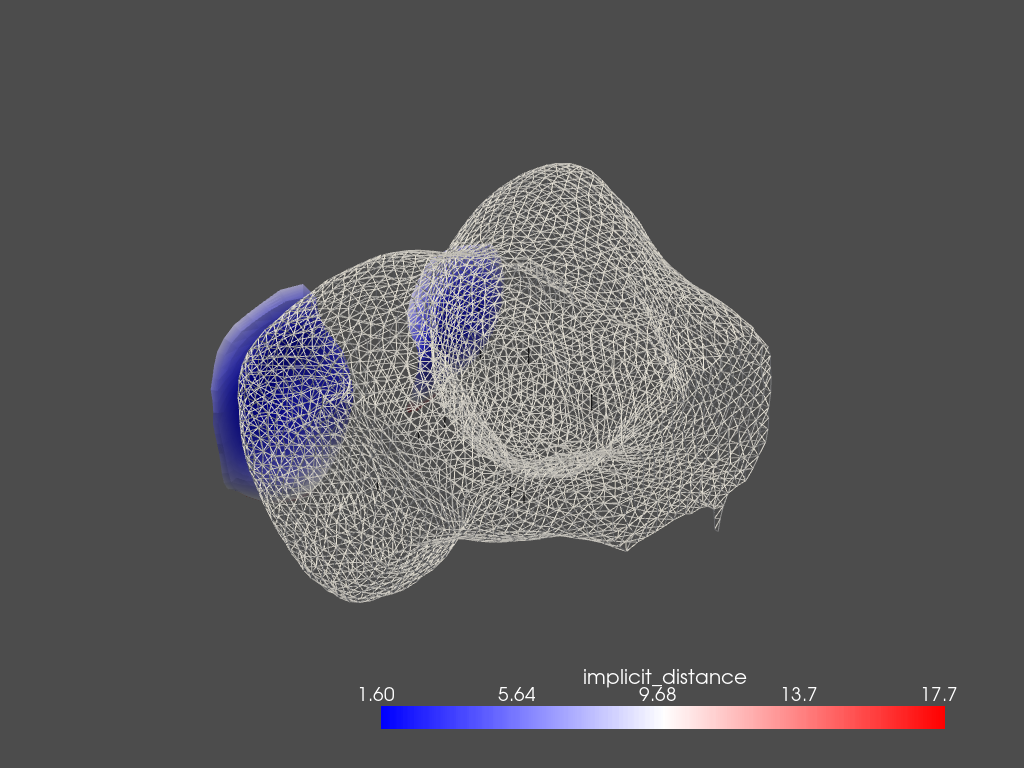

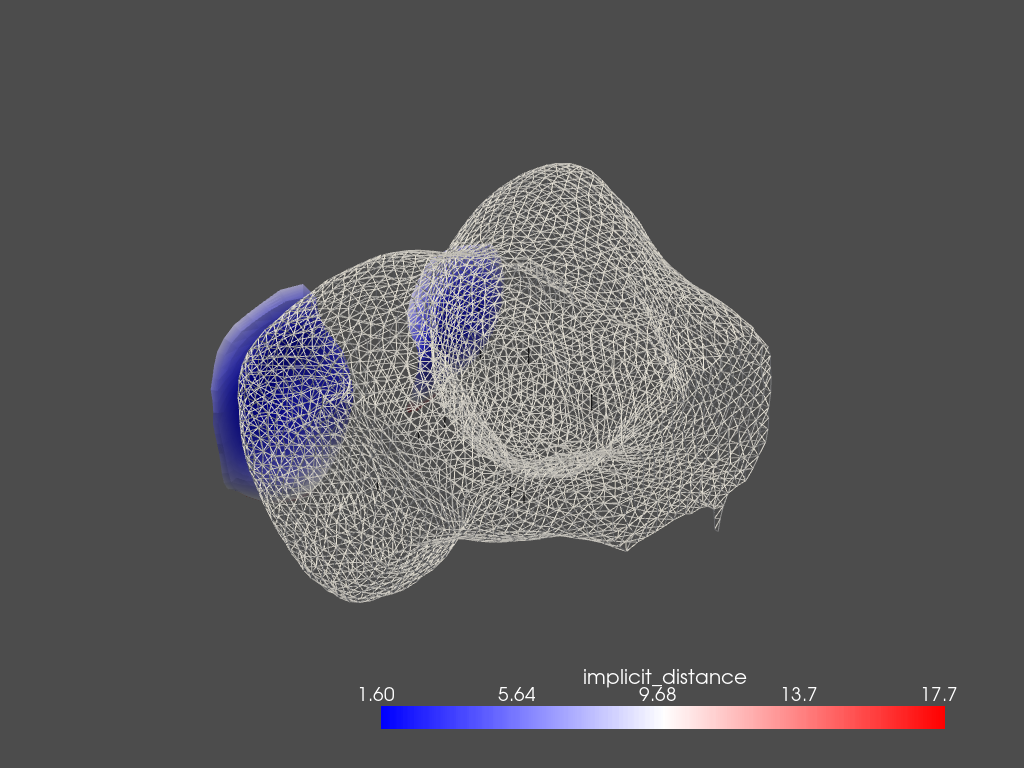

In [38]:
surf_femur = knee.femur.extract_surface()
_ = knee.tibia_cart_med.compute_implicit_distance(surf_femur, inplace=True)
_ = knee.tibia_cart_lat.compute_implicit_distance(surf_femur, inplace=True)

pl = pv.Plotter()
_ = pl.add_mesh(knee.tibia_cart_med, scalars='implicit_distance', cmap='bwr')
_ = pl.add_mesh(knee.tibia_cart_lat, scalars='implicit_distance', cmap='bwr')
_ = pl.add_mesh(surf_femur, color='w', style='wireframe')
pl.show(jupyter_backend="static")


In [39]:
implicit_distance_df = pd.DataFrame()

for key, value in patients_knees.items():
    print(key)
    surf_femur = value.femur.extract_surface()
    _ = value.tibia_cart_med.compute_implicit_distance(surf_femur, inplace=True)
    _ = value.tibia_cart_lat.compute_implicit_distance(surf_femur, inplace=True)

    impl_dist_tibia_cart_lat = value.tibia_cart_lat.active_scalars
    impl_dist_tibia_cart_med = value.tibia_cart_med.active_scalars

    df = {'Code': key,
            'Max_dist_femur_tibia_lat_car': max(impl_dist_tibia_cart_lat),
            'Min_dist_femur_tibia_lat_car': min(impl_dist_tibia_cart_lat),
            'Mean_dist_femur_tibia_lat_car': np.mean(impl_dist_tibia_cart_lat),
            'Max_dist_femur_tibia_med_car': max(impl_dist_tibia_cart_med),
            'Min_dist_femur_tibia_med_car': min(impl_dist_tibia_cart_med),
            'Mean_dist_femur_tibia_med_car': np.mean(impl_dist_tibia_cart_med),
            }
    implicit_distance_df = implicit_distance_df.append(df, ignore_index=True)
implicit_distance_df

9003406M00
9003406M12
9007827M00
9007827M12
9040390M00
9040390M12
9047800M00
9047800M12
9054866M00
9054866M12
9056363M00
9056363M12
9068453M00
9068453M12
9085290M00
9085290M12
9087863M00
9087863M12
9094865M00
9094865M12
9102858M00
9102858M12
9146462M00
9146462M12
9172459M00
9172459M12
9192885M00
9192885M12
9200458M00
9200458M12
9211869M00
9211869M12
9215390M00
9215390M12
9264046M00
9264046M12
9279291M00
9279291M12
9309170M00
9309170M12
9311328M00
9311328M12
9331465M00
9331465M12
9332085M00
9332085M12
9352437M00
9352437M12
9352883M00
9352883M12
9357137M00
9357137M12
9357383M00
9368622M00
9368622M12
9369649M00
9369649M12
9382271M00
9382271M12
9403165M00
9403165M12
9415074M00
9415074M12
9444401M00
9444401M12
9482482M00
9493245M00
9493245M12
9496443M00
9496443M12
9539084M00
9539084M12
9567704M00
9587749M00
9596610M00
9596610M12
9597990M00
9597990M12
9599539M00
9599539M12
9602703M00
9602703M12
9607698M00
9607698M12
9625955M00
9625955M12
9626069M00
9626069M12
9651690M00
9651690M12
9657464M00

,Code,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car
0,9003406M00,13.941570,0.987391,6.105886,10.304892,1.376902,4.580906
1,9003406M12,13.560157,0.800195,6.226970,10.677269,1.029139,4.306716
2,9007827M00,12.892850,1.504442,4.844820,9.243396,1.418712,4.015682
3,9007827M12,11.617199,1.119438,4.698536,9.107268,1.398252,3.890993
4,9040390M00,14.107578,2.342441,6.161425,10.770141,2.071546,5.517447
...,...,...,...,...,...,...,...
164,9993650M12,18.010511,1.444001,5.899954,13.425811,1.667098,5.354239
165,9993833M00,16.633343,1.874496,6.641354,15.426130,2.258161,4.898385
166,9993833M12,17.640301,1.481010,6.875417,12.561378,2.246910,4.471387
167,9993846M00,19.743281,2.204936,6.574413,16.267729,1.759706,5.525146


9003406M00
9003406M12
9007827M00
9007827M12
9040390M00
9040390M12
9047800M00
9047800M12
9054866M00
9054866M12
9056363M00
9056363M12
9068453M00
9068453M12
9085290M00
9085290M12
9087863M00
9087863M12
9094865M00
9094865M12
9102858M00
9102858M12
9146462M00
9146462M12
9172459M00
9172459M12
9192885M00
9192885M12
9200458M00
9200458M12
9211869M00
9211869M12
9215390M00
9215390M12
9264046M00
9264046M12
9279291M00
9279291M12
9309170M00
9309170M12
9311328M00
9311328M12
9331465M00
9331465M12
9332085M00
9332085M12
9352437M00
9352437M12
9352883M00
9352883M12
9357137M00
9357137M12
9357383M00
9368622M00
9368622M12
9369649M00
9369649M12
9382271M00
9382271M12
9403165M00
9403165M12
9415074M00
9415074M12
9444401M00
9444401M12
9482482M00
9493245M00
9493245M12
9496443M00
9496443M12
9539084M00
9539084M12
9567704M00
9587749M00
9596610M00
9596610M12
9597990M00
9597990M12
9599539M00
9599539M12
9602703M00
9602703M12
9607698M00
9607698M12
9625955M00
9625955M12
9626069M00
9626069M12
9651690M00
9651690M12
9657464M00

,Code,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car
0,9003406M00,13.941570,0.987391,6.105886,10.304892,1.376902,4.580906
1,9003406M12,13.560157,0.800195,6.226970,10.677269,1.029139,4.306716
2,9007827M00,12.892850,1.504442,4.844820,9.243396,1.418712,4.015682
3,9007827M12,11.617199,1.119438,4.698536,9.107268,1.398252,3.890993
4,9040390M00,14.107578,2.342441,6.161425,10.770141,2.071546,5.517447
...,...,...,...,...,...,...,...
164,9993650M12,18.010511,1.444001,5.899954,13.425811,1.667098,5.354239
165,9993833M00,16.633343,1.874496,6.641354,15.426130,2.258161,4.898385
166,9993833M12,17.640301,1.481010,6.875417,12.561378,2.246910,4.471387
167,9993846M00,19.743281,2.204936,6.574413,16.267729,1.759706,5.525146


### Contact pressure data

In this part, we find the maximum contact pressure for each time point, denoted frame_XXX. The difference between this notebook and the previous version, "patiens_data_loading_set2.ipynb" is that the earlier version keeps only maximal data among all time points: from frame_000 to frame_240. Keeping all data allows us to do training based on frame.


In [40]:
max_tib_lat_contact_pressure = pd.DataFrame()
max_tib_med_contact_pressure = pd.DataFrame()

for i, folder_name in enumerate(os.listdir(data_dir)):
    patient_dir = Path.joinpath(data_dir, folder_name)
    cpress_tib_cart_lat = pd.read_pickle(
          patient_dir / "CPRESS_TIB_CART_LAT_NODES.pckl",
          compression={"method": "gzip", "compresslevel": 1, "mtime": 1},  # important line
          )
    cpress_tib_cart_med = pd.read_pickle(
          patient_dir / "CPRESS_TIB_CART_MED_NODES.pckl",
          compression={"method": "gzip", "compresslevel": 1, "mtime": 1},  # important line
          )
    cpress_tib_cart_lat_max = cpress_tib_cart_lat.max(axis=0)
    cpress_tib_cart_med_max = cpress_tib_cart_med.max(axis=0)

    med = cpress_tib_cart_med_max.sort_index().to_frame().T
    lat = cpress_tib_cart_lat_max.sort_index().to_frame().T
    med["Code"] = folder_name
    lat["Code"] = folder_name

    max_tib_lat_contact_pressure = max_tib_lat_contact_pressure.append(lat, ignore_index=True)
    max_tib_med_contact_pressure = max_tib_med_contact_pressure.append(med, ignore_index=True)

max_tib_lat_contact_pressure = max_tib_lat_contact_pressure.set_index('Code').add_prefix('lat_')
max_tib_med_contact_pressure = max_tib_med_contact_pressure.set_index('Code').add_prefix('med_')

In [41]:
max_tib_med_contact_pressure

,med_frame_000,med_frame_001,med_frame_002,med_frame_003,med_frame_004,med_frame_005,med_frame_006,med_frame_007,med_frame_008,med_frame_009,...,med_frame_231,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240
Code,,,,,,,,,,,,,,,,,,,,,
9003406M00,7.619495,8.068417,7.796326,8.058777,8.098284,8.056808,8.068710,8.522012,8.772313,8.500905,...,9.759382,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571
9003406M12,6.554834,6.851065,6.611349,7.002893,7.074888,7.184821,7.231436,7.288180,7.324184,7.380648,...,9.806394,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288
9007827M00,4.956423,4.886532,4.874574,4.859203,4.956256,4.906885,4.965541,4.770316,4.588153,4.514199,...,6.839143,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464
9007827M12,5.840032,5.279257,5.079072,4.992912,4.860234,4.971857,5.081930,5.175324,4.866778,4.695190,...,6.069279,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692
9040390M00,7.856375,7.560524,7.170040,7.138691,7.347146,7.284713,7.128140,7.136445,6.756702,6.479369,...,122.803833,122.954926,123.055641,123.183105,123.373184,123.773911,123.798569,123.820938,123.799873,123.741707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993650M12,12.551897,12.030539,11.720335,11.232097,10.769986,10.851073,10.535652,10.320389,10.631481,10.109956,...,30.319807,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405
9993833M00,7.753703,6.956770,6.827500,6.726105,6.918225,7.444407,7.734060,7.148835,6.529030,6.543409,...,8.792763,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240
9993833M12,6.899568,6.183602,6.006780,5.459949,5.747677,6.043274,5.998715,5.846662,5.644117,5.623832,...,8.802687,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541


,med_frame_000,med_frame_001,med_frame_002,med_frame_003,med_frame_004,med_frame_005,med_frame_006,med_frame_007,med_frame_008,med_frame_009,...,med_frame_231,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240
Code,,,,,,,,,,,,,,,,,,,,,
9003406M00,7.619495,8.068417,7.796326,8.058777,8.098284,8.056808,8.068710,8.522012,8.772313,8.500905,...,9.759382,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571
9003406M12,6.554834,6.851065,6.611349,7.002893,7.074888,7.184821,7.231436,7.288180,7.324184,7.380648,...,9.806394,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288
9007827M00,4.956423,4.886532,4.874574,4.859203,4.956256,4.906885,4.965541,4.770316,4.588153,4.514199,...,6.839143,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464
9007827M12,5.840032,5.279257,5.079072,4.992912,4.860234,4.971857,5.081930,5.175324,4.866778,4.695190,...,6.069279,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692
9040390M00,7.856375,7.560524,7.170040,7.138691,7.347146,7.284713,7.128140,7.136445,6.756702,6.479369,...,122.803833,122.954926,123.055641,123.183105,123.373184,123.773911,123.798569,123.820938,123.799873,123.741707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993650M12,12.551897,12.030539,11.720335,11.232097,10.769986,10.851073,10.535652,10.320389,10.631481,10.109956,...,30.319807,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405
9993833M00,7.753703,6.956770,6.827500,6.726105,6.918225,7.444407,7.734060,7.148835,6.529030,6.543409,...,8.792763,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240
9993833M12,6.899568,6.183602,6.006780,5.459949,5.747677,6.043274,5.998715,5.846662,5.644117,5.623832,...,8.802687,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541


## Link all data

Now we need to link all data together and save the output as .csv

In [42]:
result = pd.merge(knee_df, implicit_distance_df, on="Code")
result = pd.merge(result, max_tib_lat_contact_pressure, on="Code")
result = pd.merge(result, max_tib_med_contact_pressure, on="Code")
result

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,med_frame_231,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,9.759382,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,9.806394,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,6.839143,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,6.069279,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692
4,9040390M00,670,3907,2560,4935,19150,2840,2840,17988.202111,226082.515840,...,122.803833,122.954926,123.055641,123.183105,123.373184,123.773911,123.798569,123.820938,123.799873,123.741707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,30.319807,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,8.792763,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,8.802687,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,7.280858,7.429334,7.494839,7.629389,7.617738,7.752455,8.115380,7.971771,8.071439,8.470410


,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,med_frame_231,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,9.759382,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,9.806394,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,6.839143,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,6.069279,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692
4,9040390M00,670,3907,2560,4935,19150,2840,2840,17988.202111,226082.515840,...,122.803833,122.954926,123.055641,123.183105,123.373184,123.773911,123.798569,123.820938,123.799873,123.741707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,30.319807,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,8.792763,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,8.802687,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,7.280858,7.429334,7.494839,7.629389,7.617738,7.752455,8.115380,7.971771,8.071439,8.470410


In [43]:
output_path = Path.joinpath(processed_data_dir, data_set_name, "out.csv")
result.to_csv(output_path)
output_path

WindowsPath('D:/University/Classes/CS481_Senior_Design_Project/f22-ai-cbl/data/processed/set_3/out.csv')

WindowsPath('D:/University/Classes/CS481_Senior_Design_Project/f22-ai-cbl/data/processed/set_3/out.csv')